In [1]:
import pandas as pd

In [3]:
df=pd.read_excel('C:\\Users\\Factory\\Desktop\\Forecasting\\Airlines+Data.xlsx')

In [4]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [6]:
import matplotlib.pyplot as plt

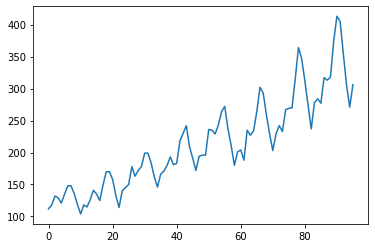

In [7]:
plt.plot(df.iloc[:,1])

# Scaling

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
df.iloc[:,1]

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [11]:
df.shape

(96, 1)

In [12]:
df

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [13]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)

In [14]:
training_size

62

In [15]:
test_size=len(df)-training_size

In [16]:
test_size

34

In [17]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [18]:
train_data

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [19]:
test_data

array([[0.42394822],
       [0.39805825],
       [0.42071197],
       [0.51779935],
       [0.6407767 ],
       [0.61165049],
       [0.50161812],
       [0.40453074],
       [0.32038835],
       [0.40453074],
       [0.44660194],
       [0.41747573],
       [0.52750809],
       [0.53398058],
       [0.53721683],
       [0.6828479 ],
       [0.84142395],
       [0.78640777],
       [0.67313916],
       [0.55016181],
       [0.43042071],
       [0.5631068 ],
       [0.58252427],
       [0.55987055],
       [0.68932039],
       [0.6763754 ],
       [0.69255663],
       [0.87378641],
       [1.        ],
       [0.97411003],
       [0.81229773],
       [0.65372168],
       [0.54045307],
       [0.65372168]])

In [20]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train.shape, y_train.shape

((57, 4), (57,))

In [23]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [24]:
X_train.shape

(57, 4, 1)

In [25]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
57/57 [==============================] - 9s 61ms/step - loss: 0.0386 - val_loss: 0.0870
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0579
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0334
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.0309
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0085 - val_loss: 0.0350
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0341
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0678
Epoch 8/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0409
Epoch 9/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0358
Epoch 10/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0362
Epoch 11

In [27]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
test_predict

array([[0.5065356 ],
       [0.60544914],
       [0.48637295],
       [0.36195296],
       [0.34284937],
       [0.30220646],
       [0.42294127],
       [0.43613183],
       [0.3561238 ],
       [0.5073356 ],
       [0.47920108],
       [0.45161068],
       [0.65115356],
       [0.7705468 ],
       [0.55940694],
       [0.45774335],
       [0.44762284],
       [0.37944436],
       [0.5884378 ],
       [0.54310447],
       [0.44796354],
       [0.6453882 ],
       [0.5668982 ],
       [0.55667984],
       [0.8130878 ],
       [0.8432332 ],
       [0.6718456 ],
       [0.5221171 ],
       [0.5017885 ]], dtype=float32)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
test_predict

array([[260.5195 ],
       [291.0838 ],
       [254.28925],
       [215.84348],
       [209.94046],
       [197.3818 ],
       [234.68886],
       [238.76474],
       [214.04227],
       [260.76672],
       [252.07314],
       [243.54771],
       [305.20645],
       [342.09894],
       [276.85675],
       [245.4427 ],
       [242.31546],
       [221.24832],
       [285.8273 ],
       [271.81927],
       [242.42075],
       [303.42496],
       [279.17157],
       [276.01407],
       [355.24414],
       [364.55905],
       [311.6003 ],
       [265.3342 ],
       [259.05264]], dtype=float32)

In [31]:
y_train.shape,train_predict.shape,train_predict

((57,),
 (57, 1),
 array([[129.79652 ],
        [123.30984 ],
        [138.83887 ],
        [149.7173  ],
        [147.51189 ],
        [136.39642 ],
        [122.79648 ],
        [110.8875  ],
        [123.83625 ],
        [117.692474],
        [128.08025 ],
        [142.54515 ],
        [134.93555 ],
        [127.07233 ],
        [153.26978 ],
        [171.29474 ],
        [166.48595 ],
        [154.84364 ],
        [133.78369 ],
        [120.470505],
        [146.90176 ],
        [146.25987 ],
        [149.60068 ],
        [180.08107 ],
        [158.63458 ],
        [171.30486 ],
        [179.12653 ],
        [198.77467 ],
        [193.43895 ],
        [175.24498 ],
        [158.54831 ],
        [148.82028 ],
        [172.31686 ],
        [171.7963  ],
        [178.16194 ],
        [191.9514  ],
        [174.75772 ],
        [180.61635 ],
        [221.99713 ],
        [223.78134 ],
        [228.92607 ],
        [187.82867 ],
        [181.72821 ],
        [172.69339 ],
        [199.0

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

175.5756756292395

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

268.76181405365077

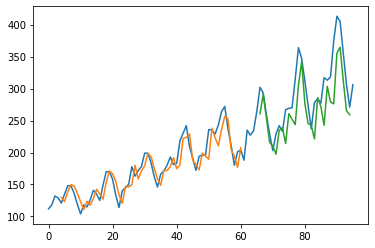

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()